### Import libraries and get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.arima.model import ARIMA

## Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv("./BTC.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,10861.5
2017-12-02,10912.7
2017-12-03,11246.2
2017-12-04,11623.9
2017-12-05,11667.1
...,...
2023-03-28,27262.2
2023-03-29,28350.4
2023-03-30,28029.5


### Split the data into training, test and validate sets

In [3]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


In [4]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1168, 1)
Test shape: (389, 1)
Validate shape: (391, 1)


In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


## ARIMA Model

### 3. Perfom ARIMA Model 

In [6]:
!pip install pmdarima

In [7]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

### 3.1 Build the best ARIMA Model using p,d,q from auto_arima

In [8]:
arima_model = pmd.auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic


C:\Users\PHUTRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22395.474, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22399.786, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22396.362, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22397.037, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22399.016, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22391.747, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22392.217, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22393.134, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22393.161, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22391.175, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22391.702, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22393.227, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=22392.038, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22394.669, Time=1.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22389.776, Time=0.26

In [9]:
order = (arima_model.order[0], arima_model.order[1], arima_model.order[2])
print(order)

(2, 1, 1)


In [10]:
def evaluate_ariama_model(x_data, y_data, order):
    y_preds = list()
    for t in range(len(y_data)):
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_preds.append(yhat)
    mse = mean_squared_error(y_data, y_preds)
    mae = mean_absolute_error(y_data, y_preds)
    mape = mean_absolute_percentage_error(y_data, y_preds)
    rmse = mean_squared_error(y_data, y_preds, squared=False)
    return y_preds, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [11]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_ariama_model(x_val, y_val, order)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142

### 3.3 Evaluate on Test data

In [12]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47895.25442093142, 47

### 3.4 Predict price for the next 30 days

In [13]:
last_index = len(df)

date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = arima_model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[47895.25442093 47796.56562233 47765.09958512 47738.73138248
 47721.99126901 47710.69543892 47703.18331526 47698.17044178
 47694.82800889 47692.59895558 47691.11247587 47690.12118289
 47689.46011812 47689.01927278 47688.72528557 47688.52923387
 47688.39849257 47688.31130491 47688.25316195 47688.21438806
 47688.18853085 47688.17128742 47688.15978827 47688.15211981
 47688.14700593 47688.14359563 47688.1413214  47688.13980478
 47688.13879339 47688.13811892]


### 4.  Evaluate accuracy validate, test data

In [14]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

                   MSE           MAE      MAPE          RMSE
Validate  7.676127e+08  27501.712074  1.408959  27705.823758
Test      2.484463e+08  12686.181401  0.460574  15762.179927


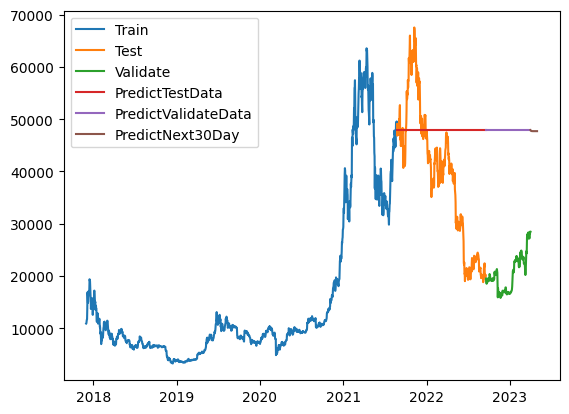

In [15]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()